In [37]:
import numpy as np
import json
import regex as re
import pandas as pd
from tqdm.notebook import tqdm
import pandas as pd

In [38]:
# the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
# function to split the data for cross-validation
from sklearn.model_selection import train_test_split
# function for transforming documents into counts
from sklearn.feature_extraction.text import CountVectorizer
# function for encoding categories
from sklearn.preprocessing import LabelEncoder

In [120]:
# to load, access, process and dump json files
import json
# regular repression
import re
# to parse HTML contents
from bs4 import BeautifulSoup

# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd 

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns

# To encode values
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
# train test split
from sklearn.model_selection import train_test_split

# for deep learning 
import tensorflow as tf
# to tokenize text
from keras.preprocessing.text import Tokenizer
# to pad sequence 
from keras.utils import pad_sequences

In [ ]:
from keras.models import load_model
model_file = 'models/5500_model.h5'
model = load_model(model_file)

In [1]:
with open('data/test_100.txt') as f:
    print(f.readline())

NUM:dist How far is it from Denver to Aspen ?



In [4]:
data = pd.read_csv('data/data_test.txt', sep='<>')

/root/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [5]:
data.head()

,NUM,dist,How far is it from Denver to Aspen,?
0,LOC,city,"What county is Modesto , California in",?
1,HUM,desc,Who was Galileo,?


In [14]:
def rreplace(s, old, new, occurrence):
    li = s.rsplit(old, occurrence)
    return new.join(li)

line = "NUM:dist How far is it from Denver to Aspen ?"
new = rreplace(line, ' ', '@@', 1)
print(new)


NUM:dist How far is it from Denver to Aspen@@?


NUM:dist@@How far is it from Denver to Aspen ?


In [29]:
# Replace first whitespace found with @@, and then replace the last whitespace found with @@
def rreplace(s, old, new, occurrence):
    li = s.rsplit(old, occurrence)
    return new.join(li)

new_file = 'data/clean/train_5500.txt'
orig_file = 'data/train_5500.txt'

with open(new_file, 'w') as modified:
    with open(orig_file, 'r+', encoding="utf8", errors='ignore') as original:
        lines = original.readlines()
        print(lines)
        for line in lines:
            new = line.replace(' ', '@@', 1)
            newer = rreplace(new, ' ', '@@', 1)
            newest = newer.replace(':', '@@', 1)
            modified.write(newest)


print(modified)

['DESC:manner How did serfdom develop in and then leave Russia ?\n', 'ENTY:cremat What films featured the character Popeye Doyle ?\n', "DESC:manner How can I find a list of celebrities ' real names ?\n", 'ENTY:animal What fowl grabs the spotlight after the Chinese Year of the Monkey ?\n', 'ABBR:exp What is the full form of .com ?\n', 'HUM:ind What contemptible scoundrel stole the cork from my lunch ?\n', "HUM:gr What team did baseball 's St. Louis Browns become ?\n", 'HUM:title What is the oldest profession ?\n', 'DESC:def What are liver enzymes ?\n', 'HUM:ind Name the scar-faced bounty hunter of The Old West .\n', 'NUM:date When was Ozzy Osbourne born ?\n', 'DESC:reason Why do heavier objects travel downhill faster ?\n', 'HUM:ind Who was The Pride of the Yankees ?\n', 'HUM:ind Who killed Gandhi ?\n', 'ENTY:event What is considered the costliest disaster the insurance industry has ever faced ?\n', 'LOC:state What sprawling U.S. state boasts the most airports ?\n', 'DESC:desc What did t

In [35]:
# Define column headers. Create blank file. Add col headers + original data to new file to get DF
col_headers = "entity@@definition@@question@@punctuation"
orig_file = 'data/clean/test_100.txt'
new_file = 'data/clean/processed/test_100.txt'
with open(orig_file, 'r') as original: data = original.read()
with open(new_file, 'w') as modified: modified.write(col_headers + "\n" + data)

In [39]:
df1 = pd.read_csv('data/clean/processed/train_1000.txt', sep='@@')
df2 = pd.read_csv('data/clean/processed/train_2000.txt', sep='@@')
df3 = pd.read_csv('data/clean/processed/train_3000.txt', sep='@@')
df4 = pd.read_csv('data/clean/processed/train_4000.txt', sep='@@')
df5 = pd.read_csv('data/clean/processed/train_5500.txt', sep='@@')


/root/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [40]:
frames = [df1, df2, df3, df4, df5]
final_df = pd.concat(frames)
final_df.shape

(15452, 4)

In [41]:
final_df.head()

,entity,definition,question,punctuation
0,DESC,manner,How did serfdom develop in and then leave Russia,?
1,ENTY,cremat,What films featured the character Popeye Doyle,?
2,DESC,manner,How can I find a list of celebrities ' real names,?
3,ENTY,animal,What fowl grabs the spotlight after the Chines...,?
4,ABBR,exp,What is the full form of .com,?


In [42]:
def normalize_text(s):
    s = s.lower()
    
    # remove punctuation that is not word-internal (e.g., hyphens, apostrophes)
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W\s',' ',s)
    
    # make sure we didn't introduce any double spaces
    s = re.sub('\s+',' ',s)
    
    return s

final_df['question'] = [normalize_text(s) for s in final_df['question']]

In [140]:
# container for sentences
headlines = np.array([headline for headline in final_df['question']])
encoder = LabelEncoder()
y = encoder.fit_transform(final_df['entity'])
labels = np.array([label for label in y])
print(labels)
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = labels.reshape(len(labels), 1)

[1 2 1 ... 5 5 2]


In [168]:
headlines[15:]

array(['what sprawling u.s state boasts the most airports',
       'what did the only repealed amendment to the u.s constitution deal with',
       'how many jews were executed in concentration camps during wwii',
       ..., 'what is the temperature today',
       'what is the temperature for cooking',
       'what currency is used in australia'], dtype='<U188')

In [167]:
labels[15:]

array([4, 1, 5, ..., 5, 5, 2])

In [164]:
final_df.tail()

,entity,definition,question,punctuation
5447,ENTY,other,what s the shape of a camel s spine,?
5448,ENTY,currency,what type of currency is used in china,?
5449,NUM,temp,what is the temperature today,?
5450,NUM,temp,what is the temperature for cooking,?
5451,ENTY,currency,what currency is used in australia,?


In [99]:
# container for sentences
headlines = np.array([headline for headline in final_df['question']])
encoder = LabelEncoder()
y = encoder.fit_transform(final_df['entity'])
labels = np.array([label for label in y])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = labels.reshape(len(labels), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# container for labels



[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]


/root/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [153]:
print(integer_encoded)

[[1]
 [2]
 [1]
 ...
 [5]
 [5]
 [2]]


In [135]:
encoder = LabelEncoder()
y = encoder.fit_transform(final_df['entity'])
labels = np.array([label for label in y])
unique = np.unique(labels)
print(unique)

[0 1 2 3 4 5]


In [98]:
len(headlines)

15452

In [152]:
headlines[0:10]

array(['how did serfdom develop in and then leave russia',
       'what films featured the character popeye doyle',
       'how can i find a list of celebrities real names',
       'what fowl grabs the spotlight after the chinese year of the monkey',
       'what is the full form of com',
       'what contemptible scoundrel stole the cork from my lunch',
       'what team did baseball s st louis browns become',
       'what is the oldest profession', 'what are liver enzymes',
       'name the scar-faced bounty hunter of the old west'], dtype='<U188')

In [78]:
print(labels)

[1 2 1 ... 5 5 2]


In [108]:
# train-test split
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(headlines, onehot_encoded, 
                                                                                          test_size=0.33, 
                                                                                          stratify=labels)

In [109]:
# model parameters
vocab_size = 1200
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [110]:
print(train_labels)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [111]:
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

# convert validation dataset to sequence and pad sequences
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [105]:
print(validation_padded)

[[  3  13 148 ...   0   0   0]
 [  3   1   4 ...   0   0   0]
 [  3 693 581 ...   0   0   0]
 ...
 [  3   4   2 ...   0   0   0]
 [  3  17   2 ...   0   0   0]
 [  3 169  10 ...   0   0   0]]


In [107]:
print(train_padded)

[[  9  18  27 ...   0   0   0]
 [  3  17   1 ...   0   0   0]
 [  3  13   2 ...   0   0   0]
 ...
 [  3  10   1 ...   0   0   0]
 [  3 747  42 ...   0   0   0]
 [ 11 288  59 ...   0   0   0]]


In [106]:
validation_padded.shape

(5100, 120)

In [112]:
# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

# compile model
# categorical-cross-entropy requires labels one-hot-encoded. sparse = as ints. binary = t/f
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 120, 16)           19200     
                                                                 
 global_average_pooling1d_6   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_12 (Dense)            (None, 24)                408       
                                                                 
 dense_13 (Dense)            (None, 6)                 150       
                                                                 
Total params: 19,758
Trainable params: 19,758
Non-trainable params: 0
_________________________________________________________________
None


In [170]:
model_file = 'models/5500_model.h5'
model.save(model_file)

In [96]:
train_padded.shape

(10352, 120)

In [95]:
train_labels.shape

(10352, 6)

In [113]:
# fit model
num_epochs = 20
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1,
                    validation_split=0.3)

# predict values
pred = model.predict(validation_padded)

Epoch 1/20
227/227 [==============================] - 2s 4ms/step - loss: 1.7046 - accuracy: 0.2314 - val_loss: 1.6474 - val_accuracy: 0.2428
Epoch 2/20
227/227 [==============================] - 1s 4ms/step - loss: 1.6474 - accuracy: 0.2331 - val_loss: 1.6343 - val_accuracy: 0.2428
Epoch 3/20
227/227 [==============================] - 1s 3ms/step - loss: 1.6347 - accuracy: 0.2633 - val_loss: 1.6205 - val_accuracy: 0.3503
Epoch 4/20
227/227 [==============================] - 1s 3ms/step - loss: 1.6067 - accuracy: 0.3265 - val_loss: 1.5776 - val_accuracy: 0.3947
Epoch 5/20
227/227 [==============================] - 1s 6ms/step - loss: 1.5341 - accuracy: 0.4284 - val_loss: 1.4791 - val_accuracy: 0.4044
Epoch 6/20
227/227 [==============================] - 1s 4ms/step - loss: 1.4125 - accuracy: 0.4937 - val_loss: 1.3491 - val_accuracy: 0.5354
Epoch 7/20
227/227 [==============================] - 1s 4ms/step - loss: 1.2803 - accuracy: 0.5472 - val_loss: 1.2320 - val_accuracy: 0.5460
Epoch 

In [115]:
# to plot model accuracy and loss
# ===============================

def plot_history(history):
    
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', c='dodgerblue', lw='2')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', c='orange', lw='2')
    plt.title('Accuracy', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', c='dodgerblue', lw='2')
    plt.plot(history.history['val_loss'], label='Validation Loss', c='orange', lw='2')
    plt.title('Loss', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [132]:
pred.shape

(5100, 6)

In [134]:
y_unique = np.unique(validation_labels)
print(y_unique)

[0. 1.]


In [131]:
validation_labels.shape

(5100, 6)

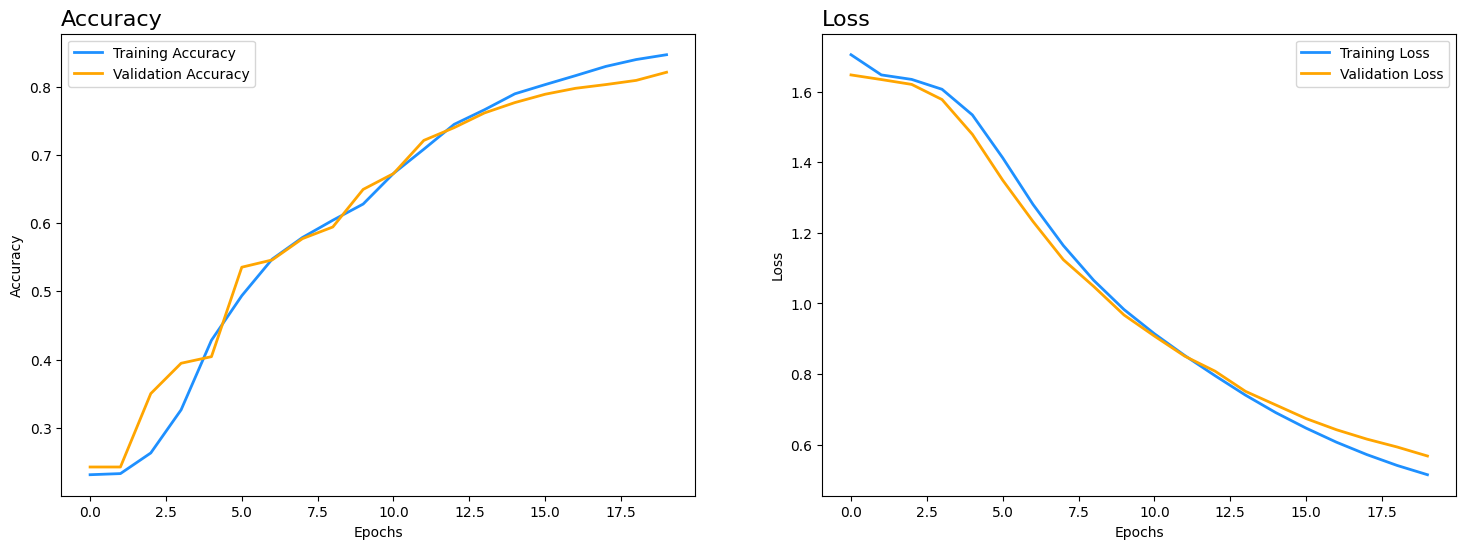

In [116]:
plot_history(history)

In [136]:
def plot_cm(pred, unique_labels):
    
    pred = pred.ravel()
    pred = np.round(pred)
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    mcm = multilabel_confusion_matrix(validation_labels, pred, labels = unique_labels)

    # cm = confusion_matrix(validation_labels, pred)
    sns.heatmap(mcm, annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_yticklabels(['Non-Sarcastic', 'Sarcastic', ])
    ax.set_xticklabels(['Non-Sarcastic', 'Sarcastic'])

    plt.show()

In [119]:
pred.shape

(5100, 6)

ValueError: Found input variables with inconsistent numbers of samples: [5100, 30600]

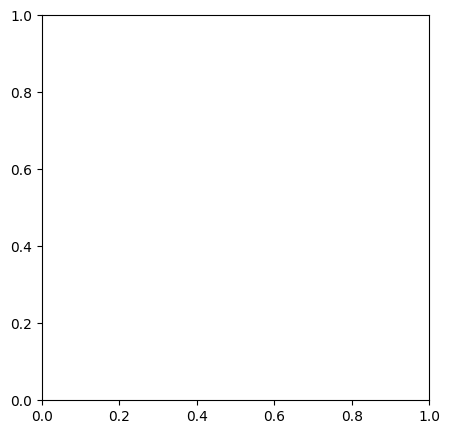

In [138]:
# plot confusion matrix
plot_cm(pred, onehot_encoded)

In [166]:
# reviews on which we need to predict
sentence = ["how did serfdom develop in and then leave russia", 
            "Is it going to be warm or cold today",
            "what is the currency of Canada",
            "what will be the temperature tomorrow",
            "who won the big game today",
            "where is the city of london",
            "what is the temperatire outside",
            "is the average temperature measured",]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
print(model.predict(padded))

1/1 [==============================] - 0s 49ms/step
[[1.25340387e-01 7.60666192e-01 1.64903179e-01 9.33512151e-02
  9.47712734e-02 8.77772212e-01]
 [6.39302805e-02 6.94757819e-01 7.54619300e-01 3.91711205e-01
  1.23314135e-01 1.43593699e-01]
 [2.04097703e-01 7.38532901e-01 4.28399384e-01 5.22801466e-02
  5.13873577e-01 3.34313154e-01]
 [1.13956295e-01 6.65037930e-01 5.36643982e-01 1.71152577e-01
  2.28280634e-01 3.34782422e-01]
 [1.71206193e-03 2.44545992e-02 9.42197323e-01 9.99637961e-01
  1.76617279e-04 3.30531925e-01]
 [7.12417841e-01 7.92420268e-01 7.16614276e-02 4.87889687e-04
  9.93553340e-01 5.06461501e-01]
 [1.40623659e-01 7.00635791e-01 4.62901831e-01 1.16388574e-01
  2.86285907e-01 3.86928856e-01]
 [1.37586385e-01 7.03803241e-01 1.15562558e-01 7.88393244e-02
  9.38607305e-02 9.30642962e-01]]


In [43]:
# pull the data into vectors
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(final_df['question'])

encoder = LabelEncoder()
y = encoder.fit_transform(final_df['entity'])

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12361, 8411)
(12361,)
(3091, 8411)
(3091,)


In [44]:
# create classifier
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [45]:
nb.score(x_test, y_test)

0.9310902620511161

In [57]:
nb.predict(vectorizer.fit_transform(["Where is Omaha Nebraska"]))

ValueError: X has 4 features, but MultinomialNB is expecting 8411 features as input.

In [51]:
# instead of nb.coef_ function we need to use nb.feature_log_prob_ function
# The coef_ is mirroring those but returns only the values for class 1 (True) in the binary case.
coefs = nb.feature_log_prob_
print(coefs.shape)
print(coefs)

(6, 8411)
[[ -9.17678359  -9.17678359  -9.17678359 ...  -9.17678359  -9.17678359
   -9.17678359]
 [-10.21152357 -10.21152357 -10.21152357 ...  -9.51837639 -10.21152357
  -10.21152357]
 [ -9.76117486 -10.45432204 -10.45432204 ... -10.45432204  -9.76117486
   -9.76117486]
 [ -8.81575585 -10.42519377 -10.42519377 ... -10.42519377 -10.42519377
  -10.42519377]
 [ -9.00940668  -8.72172461 -10.10801897 ... -10.10801897 -10.10801897
  -10.10801897]
 [-10.16877063 -10.16877063 -10.16877063 ... -10.16877063 -10.16877063
  -10.16877063]]


In [47]:
def make_reverse_vocabulary(vectorizer):
    revvoc = {}

    vocab = vectorizer.vocabulary_
    for w in vocab:
        i = vocab[w]

        revvoc[i] = w

    return revvoc

In [53]:
rev = make_reverse_vocabulary(vectorizer=vectorizer)
len(rev)

8411